In [5]:
import pandas as pd
from pathlib import Path
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
DPI=300

import scipy

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42

In [2]:
DIR2LOAD = Path("/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/nichenet/concat_withWu2022/nichenet_microenvall_celltypes/intersect_cellphonedb/")
receiver ='ipEMT'

DIR2SAVE = DIR2LOAD.joinpath("survival_analysis/")
DIR2SAVE.mkdir(parents=True, exist_ok=True)

FIG2SAVE = DIR2SAVE.joinpath("Figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)

In [3]:
# to finnd specific ligands used script: 
# ~/code/CRC/st/CRC_LM_VISIUM/A12_nichenet/A2_nichnet_R/A_10_ligand_specificity.R
# ~/code/CRC/st/CRC_LM_VISIUM/A12_nichenet/A2_nichnet_R/A9_circos_plot_ipEMT.R
ap1_ligands_spec = pd.read_csv(DIR2LOAD.joinpath("AP1_regulon_updatedipEMT_ligand_specificity_senders.csv"),
                               header=0)

nfkb_ligands_spec = pd.read_csv(DIR2LOAD.joinpath("NFKB_regulon_combinedipEMT_ligand_specificity_senders.csv"),
                               header=0)

In [6]:
ap1_ligands_spec['ligand_type'] = np.where(ap1_ligands_spec['ligand_type']=='Common', 
                                           'Common Ligands AP-1',
                                          ap1_ligands_spec['ligand_type'])

In [7]:
nfkb_ligands_spec['ligand_type'] = np.where(nfkb_ligands_spec['ligand_type']=='Common', 
                                           'Common Ligands NF-KB',
                                          nfkb_ligands_spec['ligand_type'])

In [8]:
merged_ligands = pd.concat([ap1_ligands_spec, nfkb_ligands_spec]).drop_duplicates()

Here’s a step-by-step breakdown:
groups the ligand values by the ligand_type, creates lists for each group, and then converts the result into a dictionary.

    1. groupby('ligand_type'): Groups the DataFrame by the ligand_type column.
    2. ['ligand'].apply(list): Applies the list function to each group, turning the ligand column entries into lists.
    3. .to_dict(): Converts the resulting series into a dictionary.

In [9]:
# Group the ligands by their ligand_type and convert to dictionary
ligands_specific = merged_ligands.groupby('ligand_type')['ligand'].apply(list).to_dict()
ligands_specific

{'CD8Tex-specific': ['CCL5', 'IFNG', 'IL16', 'XCL1'],
 'Common Ligands AP-1': ['COL3A1',
  'COL6A2',
  'COL1A2',
  'NAMPT',
  'ANXA1',
  'APOE',
  'COL15A1',
  'JAM3',
  'COL27A1',
  'LAMC1',
  'CXCL2',
  'TGFB1',
  'ENTPD1',
  'LGALS9',
  'FGF2',
  'TGFB2',
  'HGF',
  'APP'],
 'Common Ligands NF-KB': ['IL1A',
  'TNFSF10',
  'COL6A3',
  'SIRPG',
  'PROS1',
  'VCAM1',
  'CD99',
  'JAM3',
  'C3',
  'FN1',
  'SELL',
  'COL18A1',
  'COL6A2',
  'TNFSF4',
  'COL3A1',
  'CXCL2',
  'COL27A1',
  'LRPAP1',
  'CEACAM5',
  'SEMA3A',
  'COL4A2',
  'COL8A1',
  'COL15A1',
  'NAMPT',
  'APOE',
  'COL7A1',
  'LAMC1',
  'IL10'],
 'ECM CAF-specific': ['ANGPT1', 'ANGPT2', 'COL14A1', 'HGF', 'PGF'],
 'IL1B Mac-specific': ['CCL5',
  'CXCL3',
  'PLAU',
  'TNF',
  'TNFSF12',
  'TNFSF13',
  'TNFSF9',
  'VEGFB',
  'CD72',
  'CXCL10',
  'DSC2',
  'ICAM4',
  'PDGFB'],
 'Myofibroblast-specific': ['CDH2',
  'COL7A1',
  'CXCL12',
  'EFNA5',
  'FBN1',
  'FGF7',
  'FN1',
  'IGFBP3',
  'IL6',
  'MMP2',
  'TIMP1',
  'TNC

In [10]:
### Get primary DEGs
file = '/data/BCI-CRC/SO/data/CRC_multiome/ArchR_final_analysis/DEGs/primaryAllCells_DEGs_seurat_wilcoxon.xlsx'
xls = pd.ExcelFile(file)
signatures_dict_P = dict()
for sheet in xls.sheet_names:
    signatures_dict_P[sheet] = pd.read_excel(file, sheet_name=sheet)
    signatures_dict_P[sheet] = list(signatures_dict_P[sheet].loc[:,'gene'])
print ('\nDEGs primary:')
for key in signatures_dict_P:
    print (key, len(signatures_dict_P[key]))

signatures_dict_P['Stem NOTUM'] = signatures_dict_P['Stem (NOTUM high)']
del(signatures_dict_P['Stem (NOTUM high)'])

signatures_dict_P['iREC'] = signatures_dict_P['ipEMT']
del(signatures_dict_P['ipEMT'])

signatures_dict_P['REC'] = signatures_dict_P['pEMT']
del(signatures_dict_P['pEMT'])




DEGs primary:
ipEMT 6801
Stem (NOTUM high) 5706
pEMT 7684
HLA high 6164
Stem 6318
Colonocyte 6590
Intermediate 6525
TA2 2122
Hypoxia 4436
UPR 4864
Tuft 2928
TA1 6160
Goblet 7237
Enteroendocrine 7121
Plasma 351
Myeloid cycling 2055
Treg HSP 65
GREM1 HSP CAF 1946
Stalk-like endo 1194
Tip-like endo 1320
CXCL14 BMP CAF 1191
Lymphatic endo 1174
Pericyte 1141
Endo cycling 2622
Myofibroblast 1865
Stromal cycling 3819
MMP CAF 2915
SMC 514
C3 iCAF 1313
Enteric glial 494
HSP Mono 168
NLRP3 Mac 490
C1QC Mac 985
FCN1 Mono 170
SPP1 Mac 712
pDC 343
cDC2 650
IL1B Mac 845
migDC 351
FCGR3A Mono 517
PLTP LYVE1 Mac 366
Neutrophil 78
B 54
Treg 97
CD4 Th 39
CD8 Tex 86
CD4 Tfh 68
CD4 Tn 44
CD8 Tem 45
CD8 Tem HSP 60
CD4 Th HSP 63
T cycling 521
CD4 Th17 107
gdT 87
NK2 43
NKT 40
NK1 50
ILC3 53
Mast 115
cDC1 945


In [11]:
# load TCGA data
expression = pd.read_parquet("/data/BCI-CRC/SO/data/public/TCGA/COADREAD_TPonly_uniquePatients_zscore.parquet")
expression.head(3)

TCGA-A6-5664  TCGA-D5-6530  TCGA-AA-3556  TCGA-AA-3818  \
index                                                                        
ENSG00000000003.15     -0.947482     -1.552415     -0.133085      0.828211   
ENSG00000000005.6      -0.785193     -1.310053      0.037304      1.405941   
ENSG00000000419.13     -1.324709     -1.237521      0.312150     -0.289543   

                    TCGA-AA-3660  TCGA-DM-A28G  TCGA-AA-3976  TCGA-G4-6307  \
index                                                                        
ENSG00000000003.15      0.107183      0.153849      1.481817      0.660882   
ENSG00000000005.6      -0.639623      0.737881      0.820617      0.025309   
ENSG00000000419.13      0.143101     -0.607545      1.398614     -0.099116   

                    TCGA-AA-3522  TCGA-AA-3530  ...  TCGA-CI-6623  \
index                                           ...                 
ENSG00000000003.15      0.417695      0.984411  ...      0.701069   
ENSG00000000005.6       0.176256      0.151691  ...     -0.329749   
ENSG00000000419.13     -0.050033      0.434238  ...      1.943809   

                    TCGA-AH-6643  TCGA-DY-A0XA  TCGA-AH-6897  TCGA-AH-6903  \
index                                                                        
ENSG00000000003.15     -0.348427      0.874687      0.443539      0.823830   
ENSG00000000005.6      -1.598067     -0.170324      2.777399     -1.088029   
ENSG00000000419.13     -0.145974      0.930454      0.489420      0.062678   

                    TCGA-AG-3609  TCGA-AG-3605  TCGA-AG-3894  TCGA-AG-3574  \
index                                                                        
ENSG00000000003.15      0.613325      1.677158      0.328236      1.686084   
ENSG00000000005.6       0.225478     -1.175697     -0.014784     -0.730985   
ENSG00000000419.13      1.145744      0.081625     -0.456520      0.793907   

                      Gene  
index                       
ENSG00000000003.15  TSPAN6  
ENSG00000000005.6     TNMD  
ENSG00000000419.13    DPM1  

[3 rows x 610 columns]

In [12]:
# compute score ligands 
score_dict_ligands_specific = dict()
for key in ligands_specific:
    score_dict_ligands_specific[key] = expression[expression.Gene.isin(ligands_specific[key])]
    score_dict_ligands_specific[key] = score_dict_ligands_specific[key].iloc[:,:-1]
    score_dict_ligands_specific[key] = score_dict_ligands_specific[key].mean(axis=0)

### Score cancer signatures for genes
n_genes = 50
cancer_dict_P = dict()
for key in signatures_dict_P:
    cancer_dict_P[key] = expression[expression.Gene.isin(signatures_dict_P[key][0:n_genes])]
    cancer_dict_P[key] = cancer_dict_P[key].iloc[:,:-1]
    cancer_dict_P[key] = cancer_dict_P[key].mean(axis=0)

0.20262767237336937	4.5935045462474636e-07	iREC	CD8Tex-specific
-0.04741316204852212	0.24268104972903715	iREC	Common Ligands AP-1
-0.046594491312729046	0.2509204112155572	iREC	Common Ligands NF-KB
-0.30260316737492365	2.312796930080369e-14	iREC	ECM CAF-specific
0.48447177749565135	3.6585252711558894e-37	iREC	IL1B Mac-specific
-0.0524054336747737	0.19653453190527775	iREC	Myofibroblast-specific
0.2341666274046966	4.96385980127379e-09	iREC	NLRP3 Mac-specific
0.26329513576133035	4.082528099681291e-11	iREC	Neutrophil-specific
-0.08925747989148089	0.02762565105220788	iREC	Pericyte-specific
0.42270235258928185	8.627068446776097e-28	iREC	SPP1 Mac-specific
0.2757490484945901	4.339795585100286e-12	iREC	Treg-specific
-0.11802429188063335	0.003536295739679605	REC	CD8Tex-specific
-0.23615134035480986	3.6484471201893017e-09	REC	Common Ligands AP-1
-0.259217219780175	8.295467403185632e-11	REC	Common Ligands NF-KB
-0.4332112447552723	2.977988081874242e-29	REC	ECM CAF-specific
0.21189142786658527	1.303

/tmp/3809347.1.all.q/ipykernel_37764/835152010.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4,4))


-0.4271415979361679	2.1113582997540347e-28	Stem NOTUM	Common Ligands AP-1
-0.39723195862760896	1.870597180322489e-24	Stem NOTUM	Common Ligands NF-KB
-0.27178761441141647	8.965286226791724e-12	Stem NOTUM	ECM CAF-specific
-0.37754165983724614	4.568514286182401e-22	Stem NOTUM	IL1B Mac-specific
-0.41825983179451764	3.455997903955747e-27	Stem NOTUM	Myofibroblast-specific
-0.08190667689370948	0.04332843555961892	Stem NOTUM	NLRP3 Mac-specific
-0.2179225676663832	5.564833589300855e-08	Stem NOTUM	Neutrophil-specific
-0.34903376733936836	6.905914524537876e-19	Stem NOTUM	Pericyte-specific
-0.310225394788278	4.722617386336608e-15	Stem NOTUM	SPP1 Mac-specific
-0.010430730244825225	0.7972660619172953	Stem NOTUM	Treg-specific
-0.3760355413198724	6.852119656774411e-22	Stem	CD8Tex-specific
-0.49025563237830905	3.833780984052074e-38	Stem	Common Ligands AP-1
-0.4496286794168908	1.2162051116795131e-31	Stem	Common Ligands NF-KB
-0.35472770982411445	1.696455643040197e-19	Stem	ECM CAF-specific
-0.26124039758

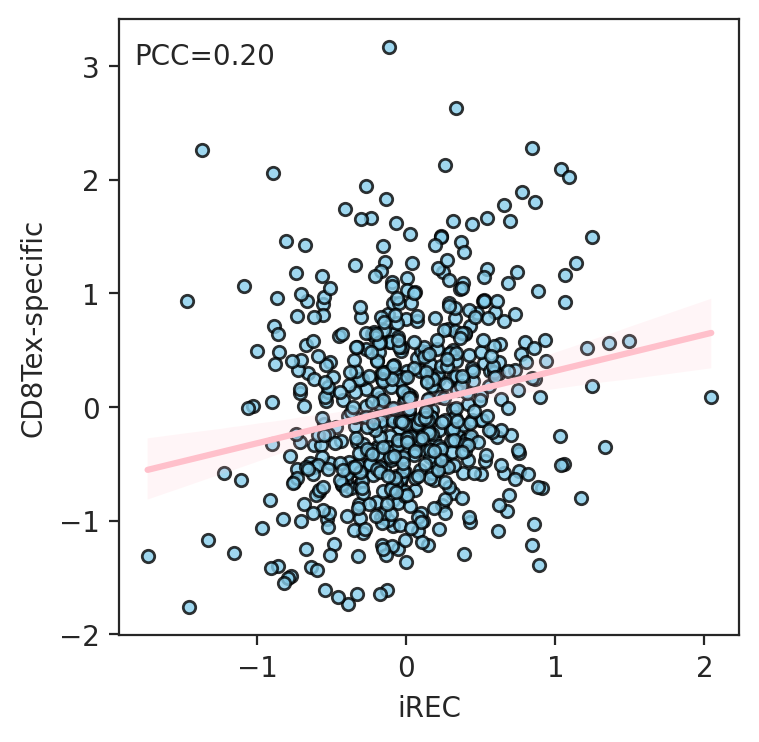

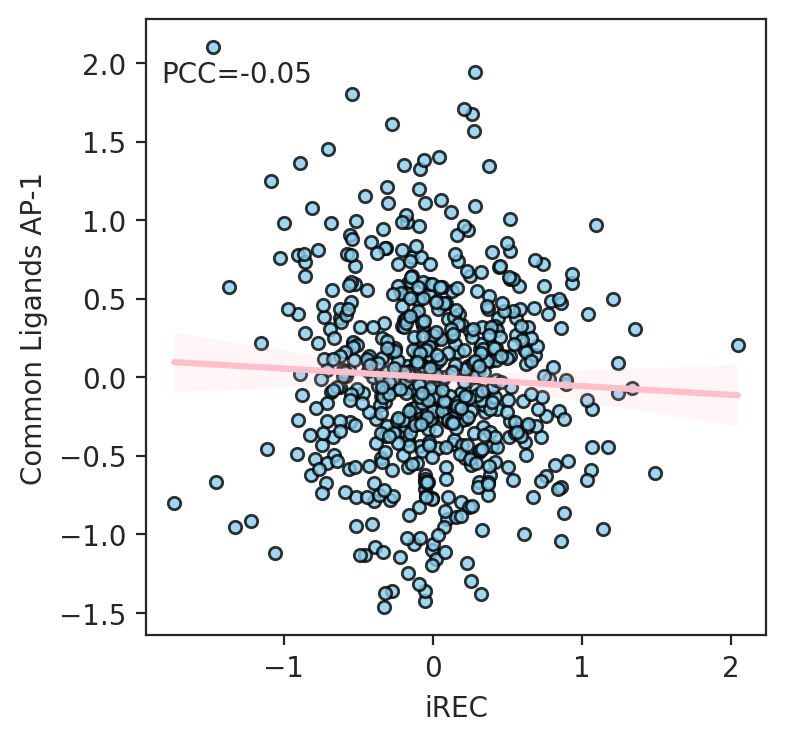

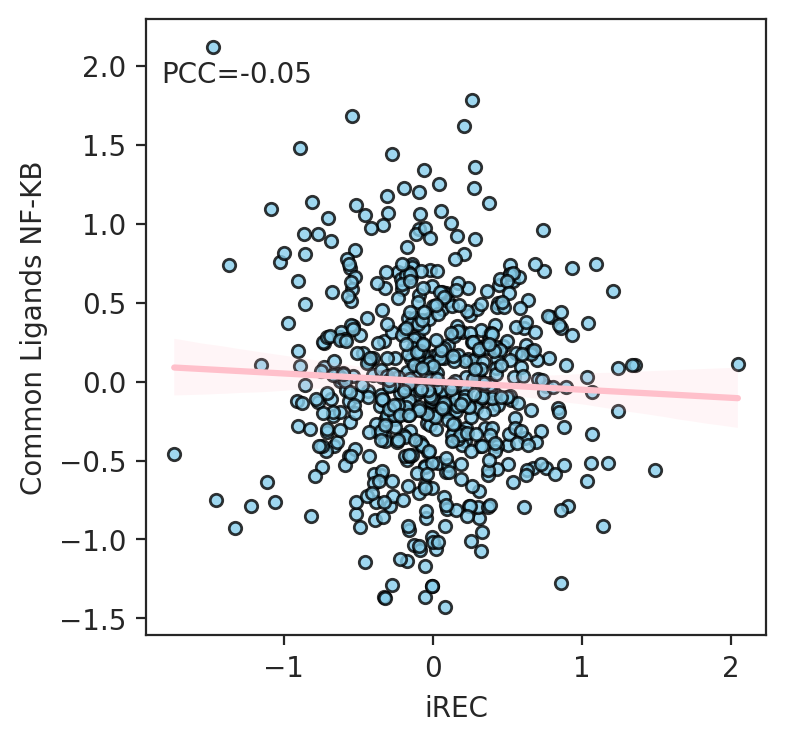

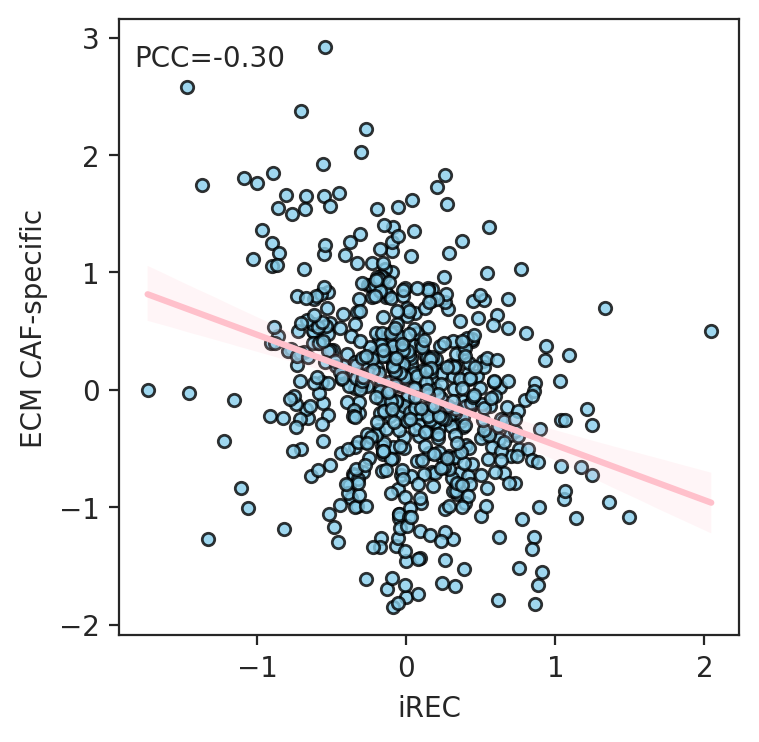

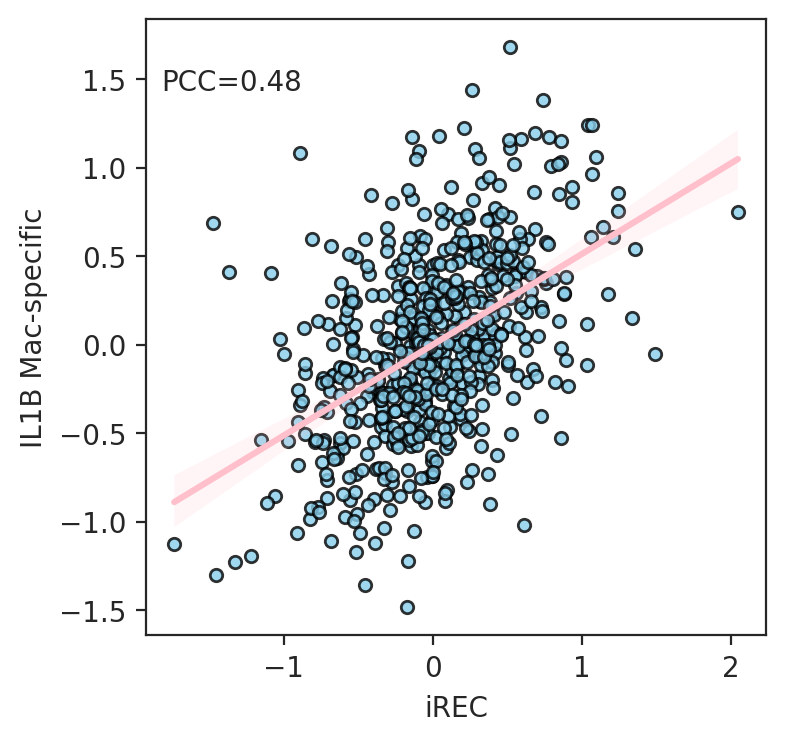

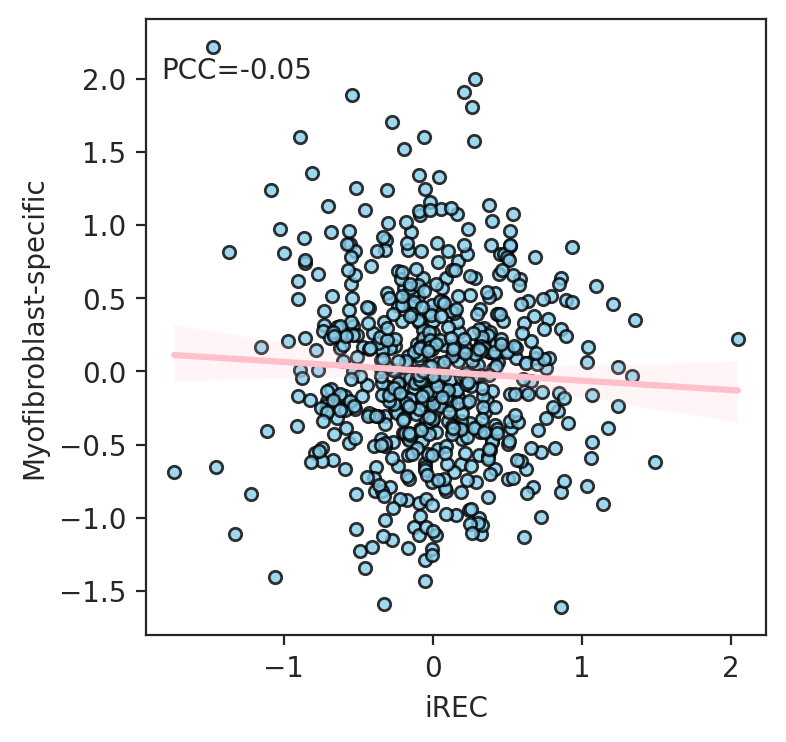

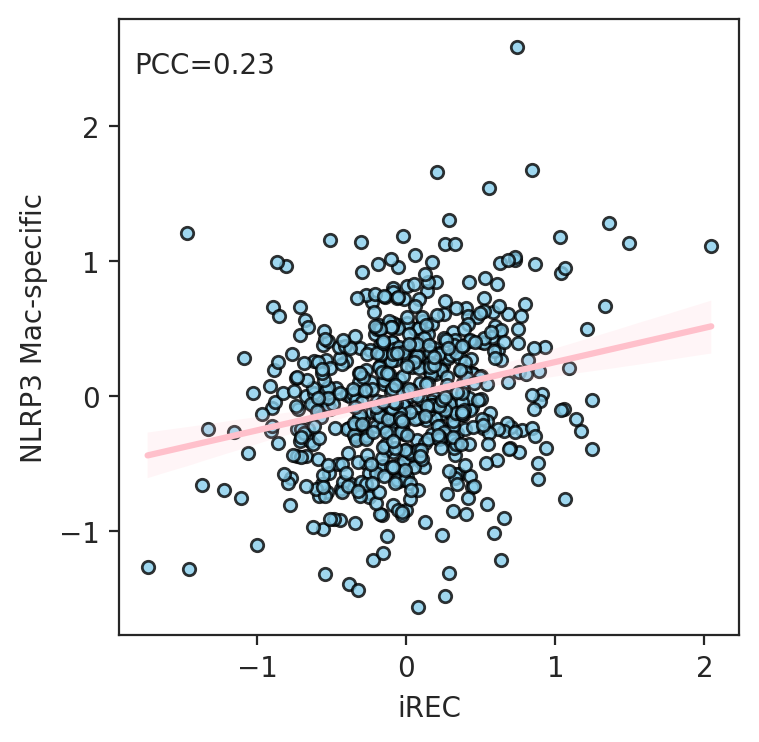

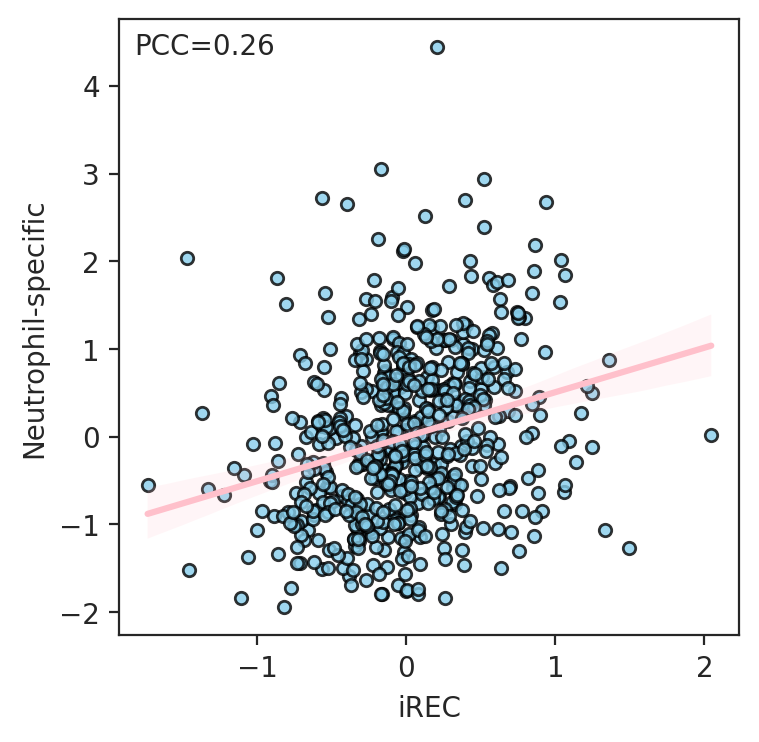

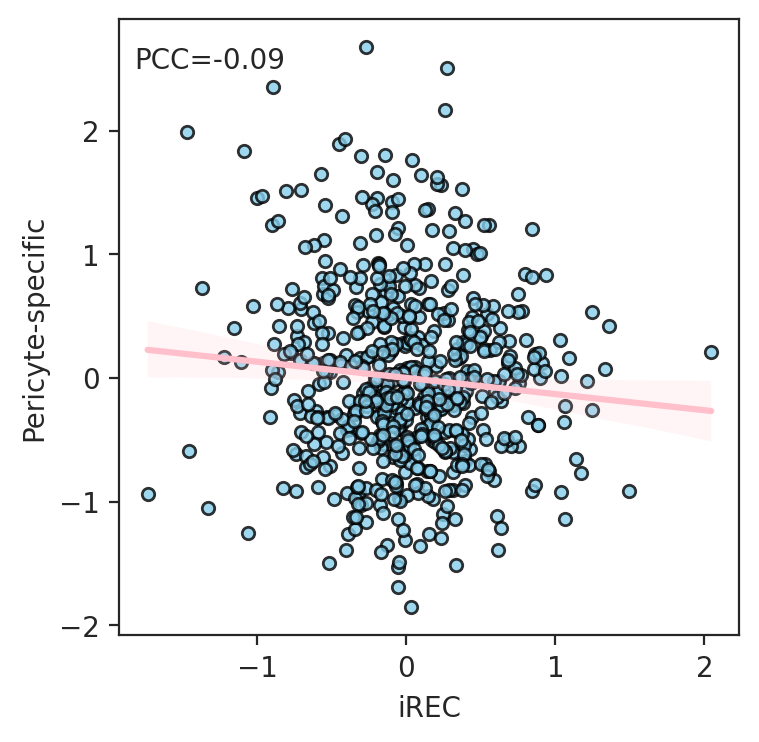

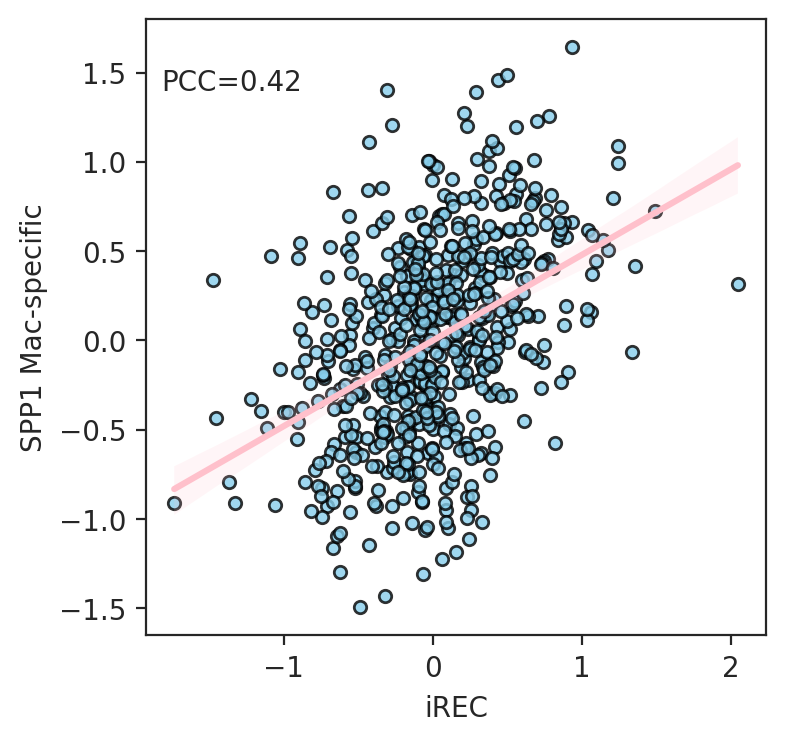

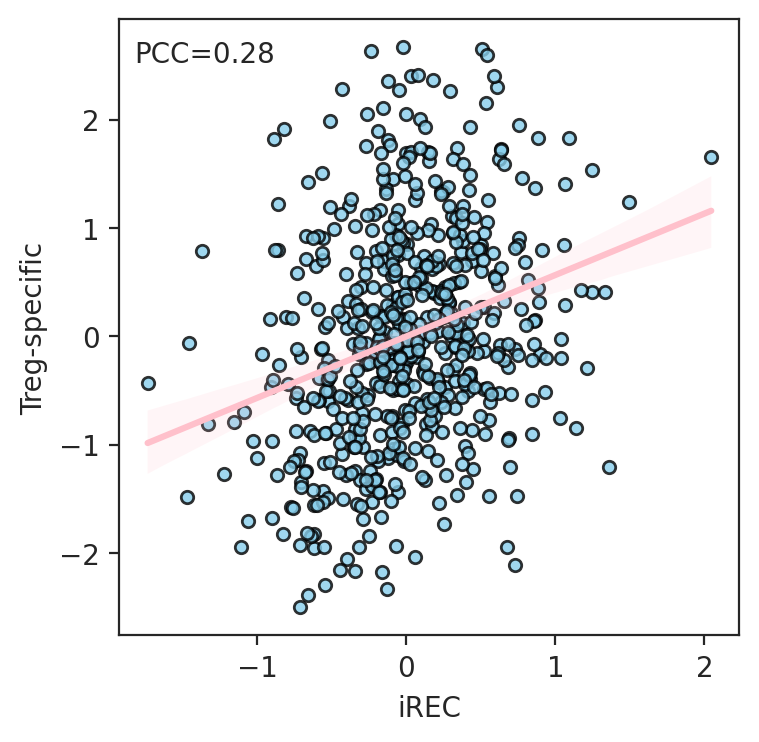

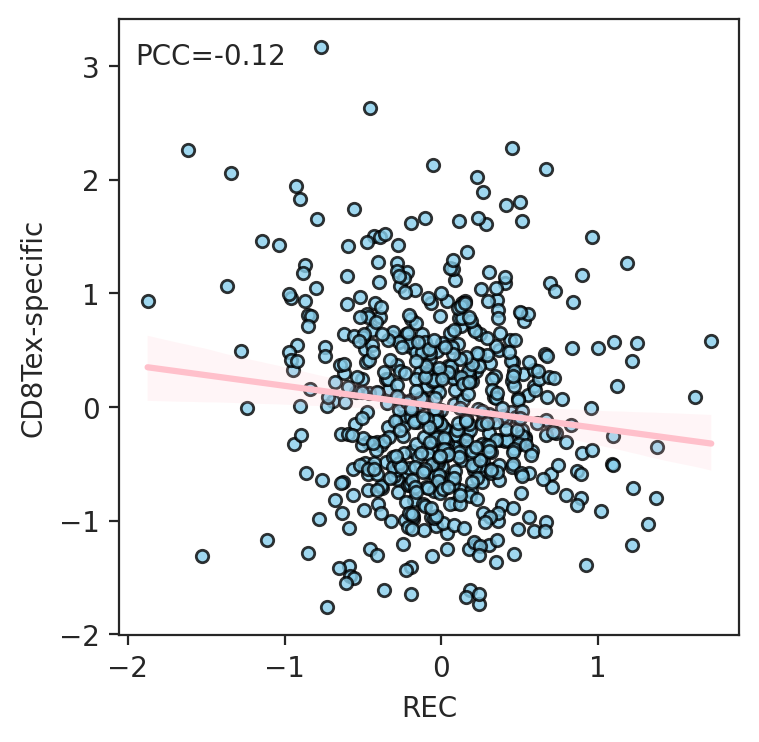

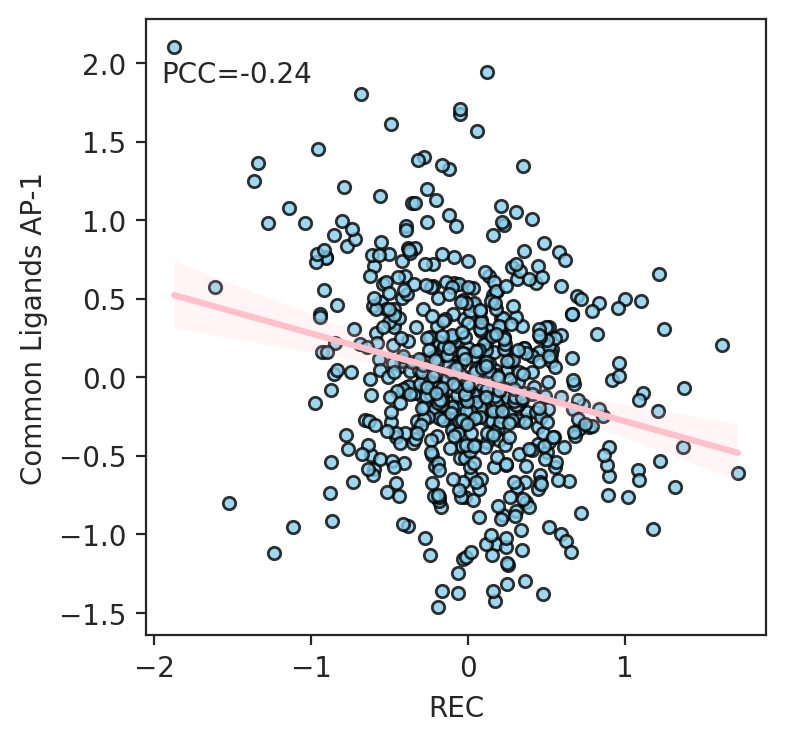

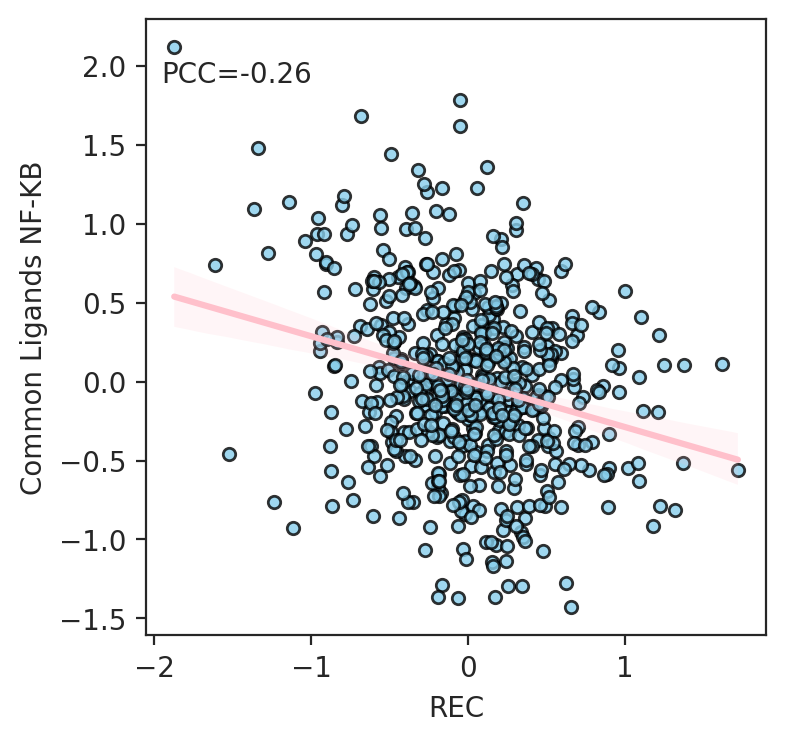

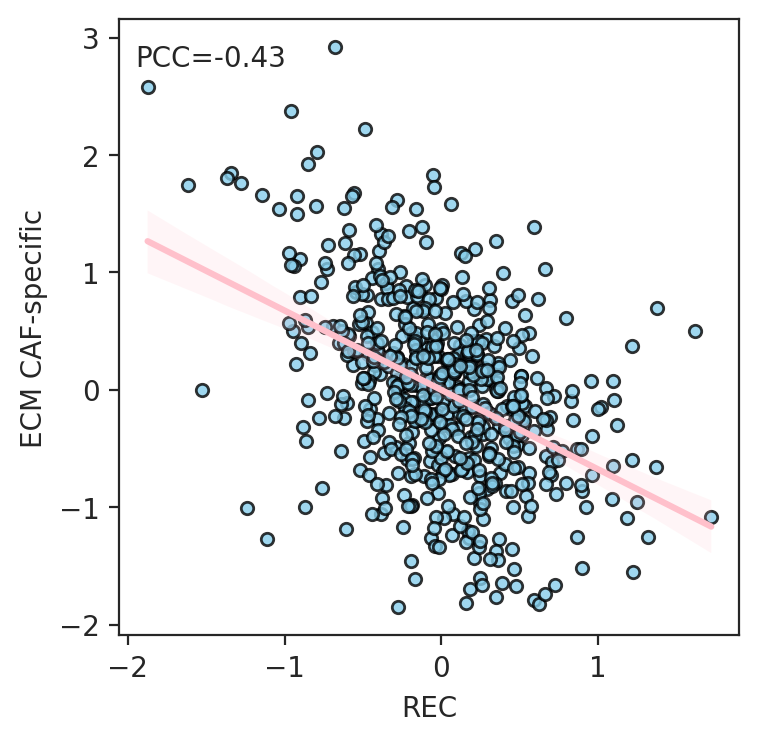

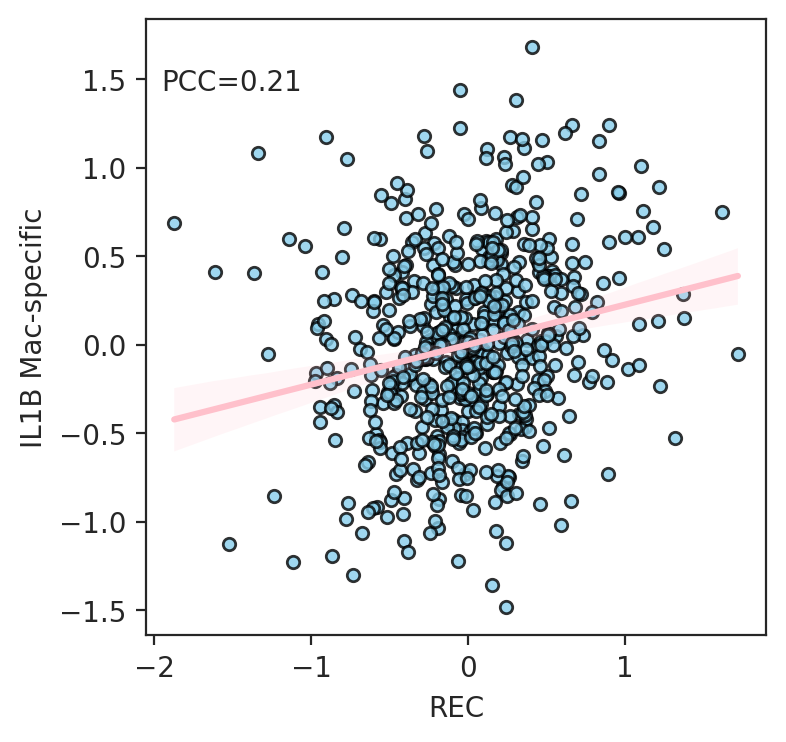

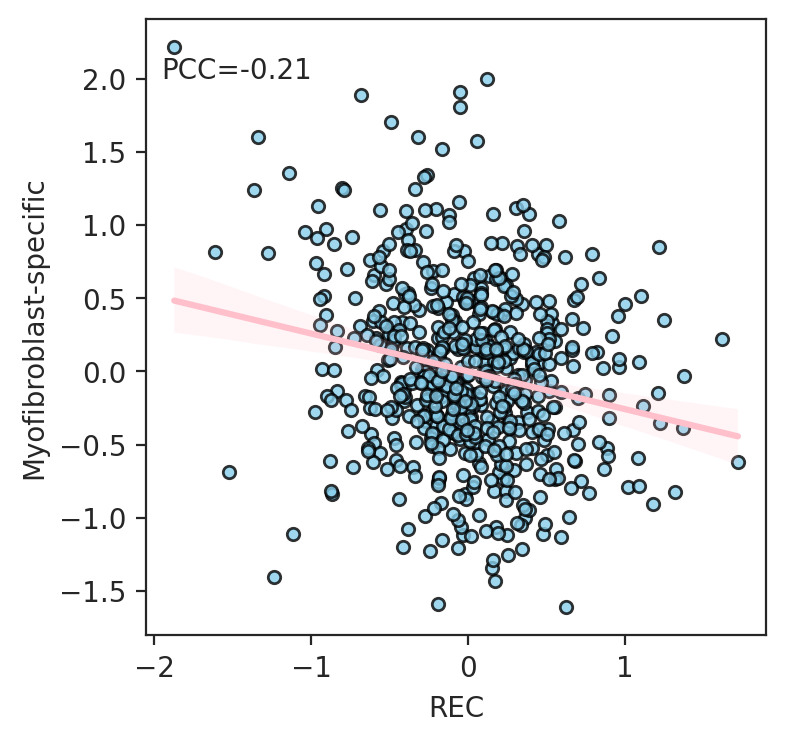

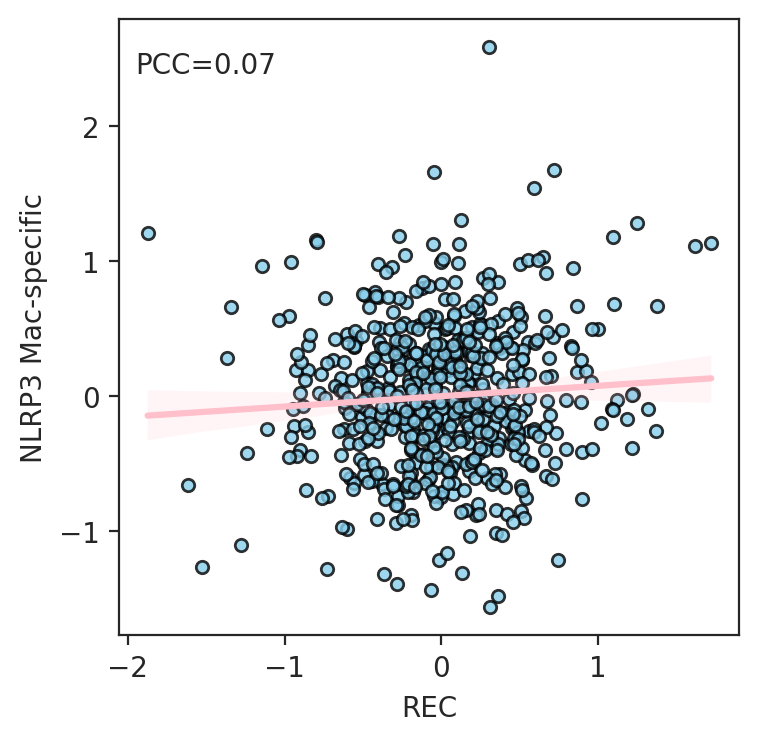

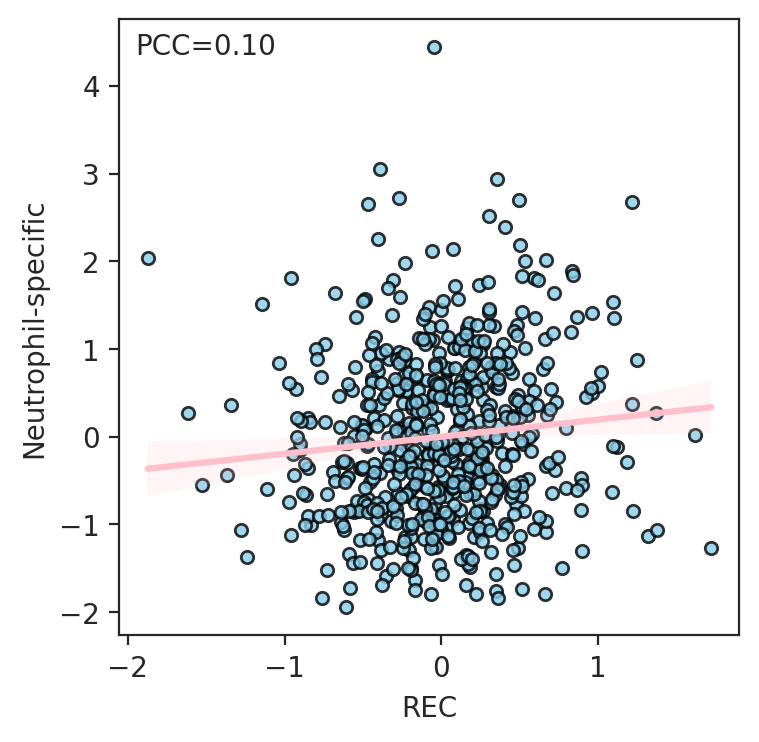

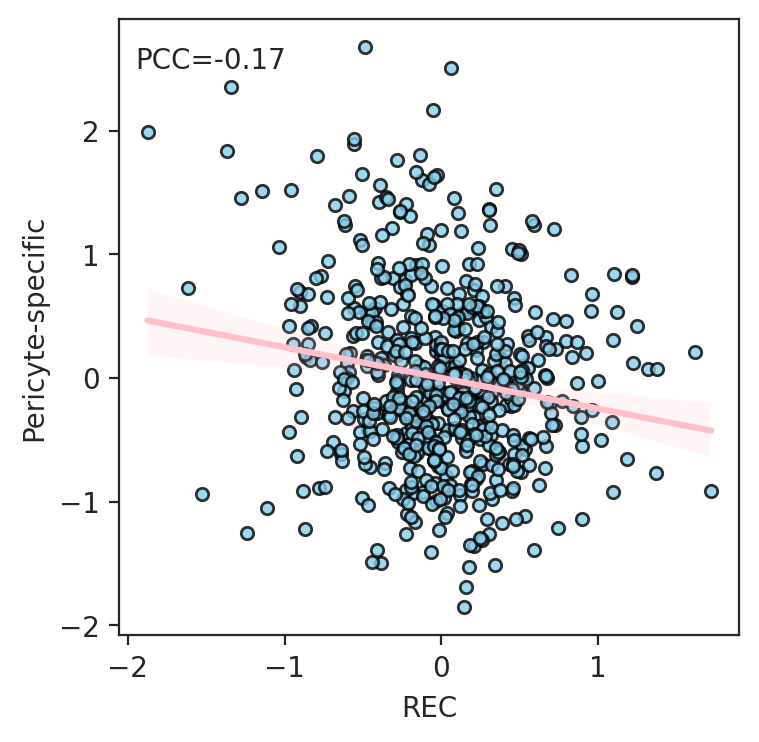

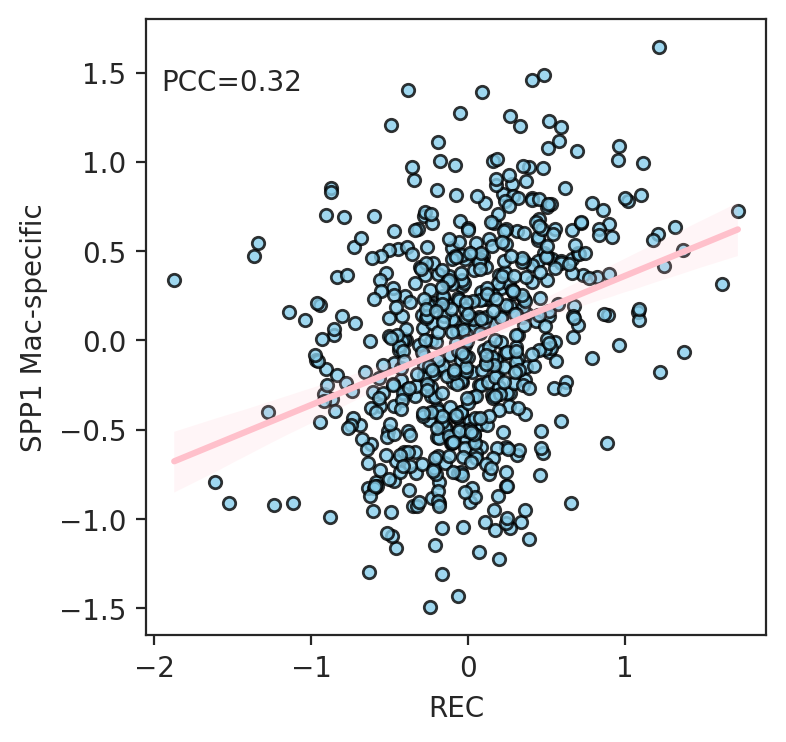

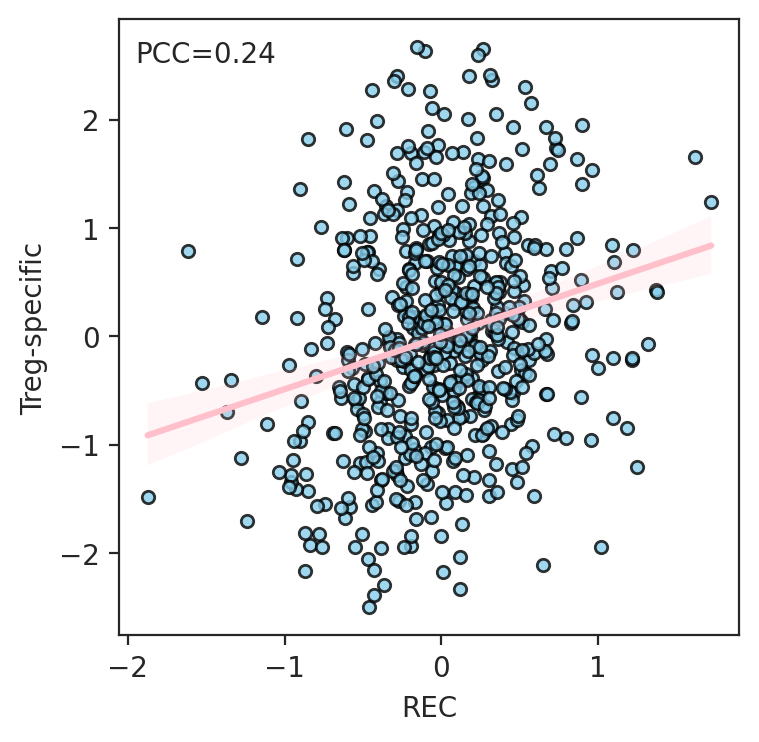

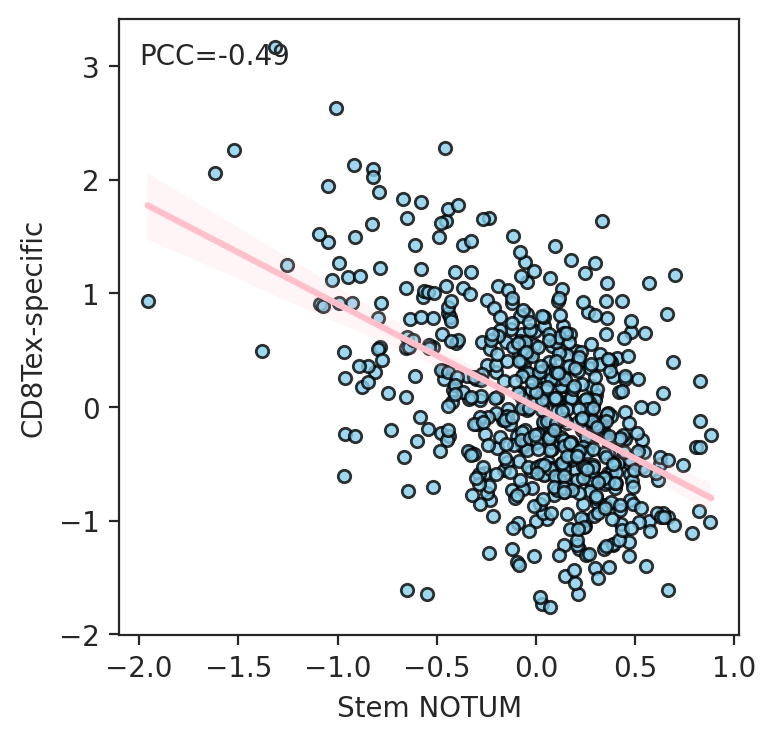

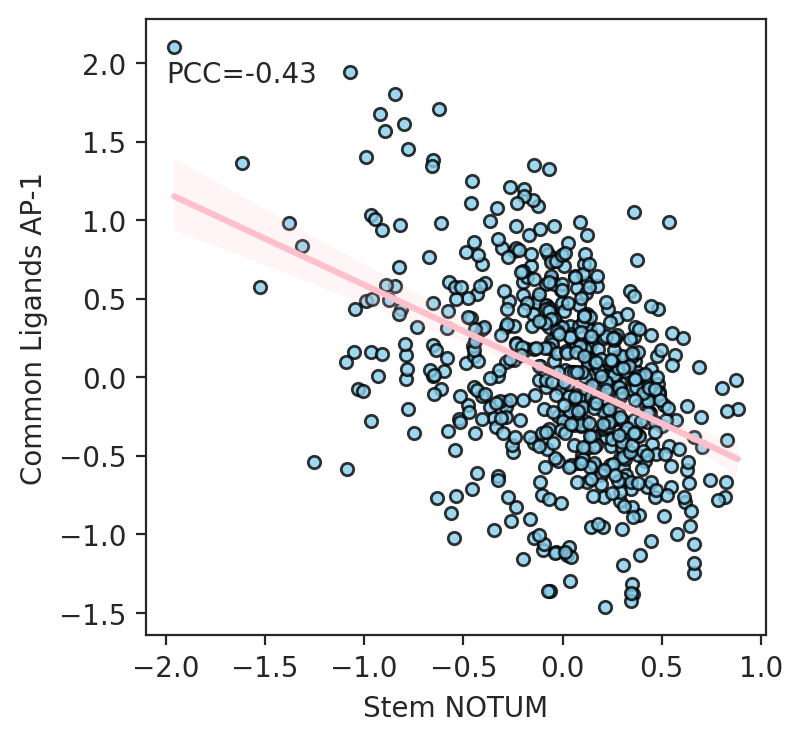

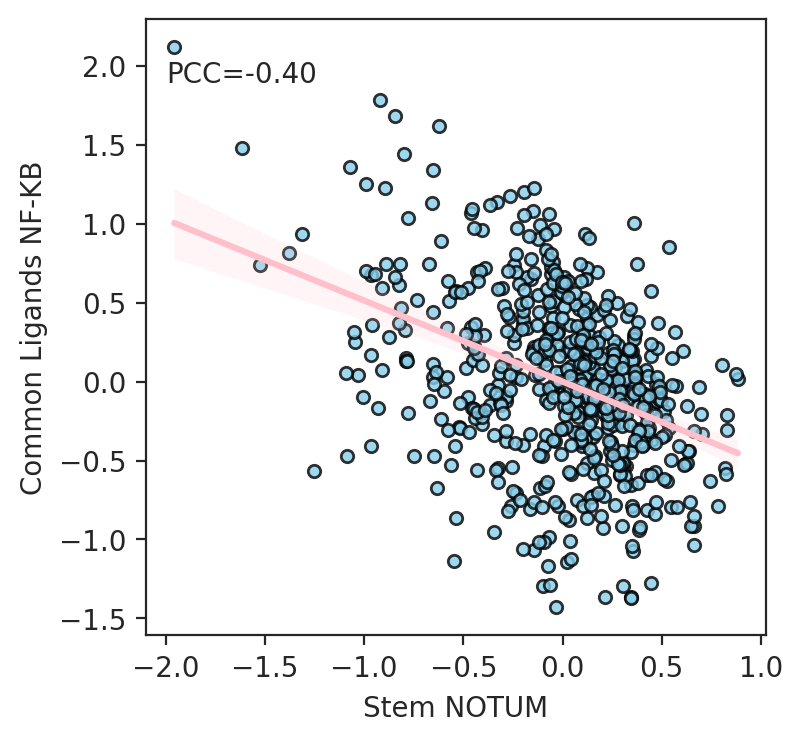

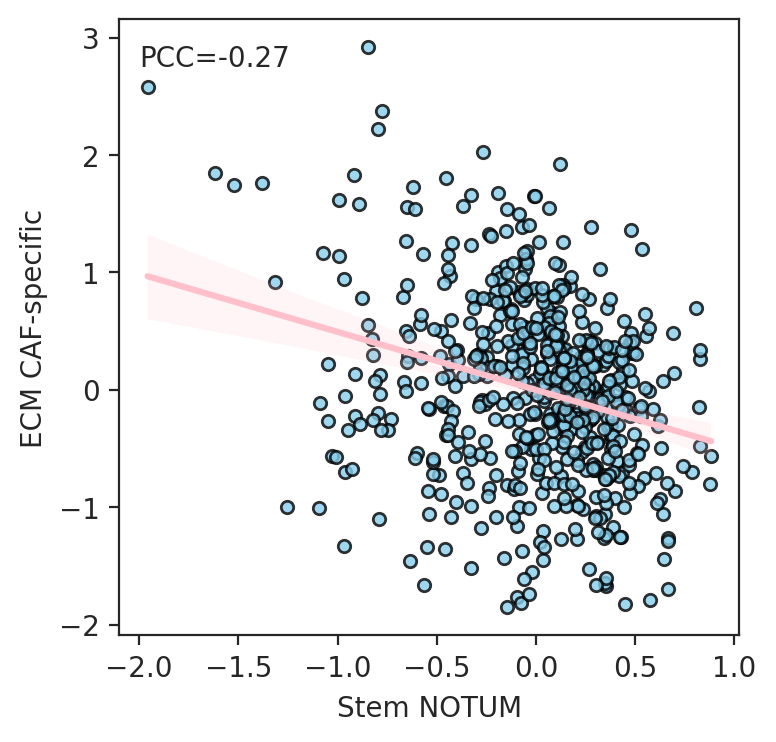

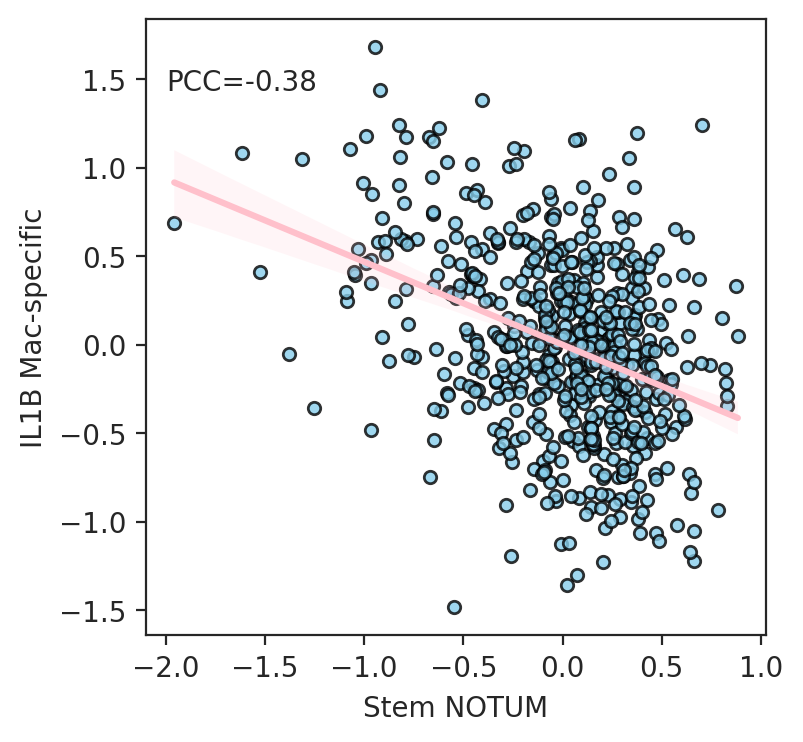

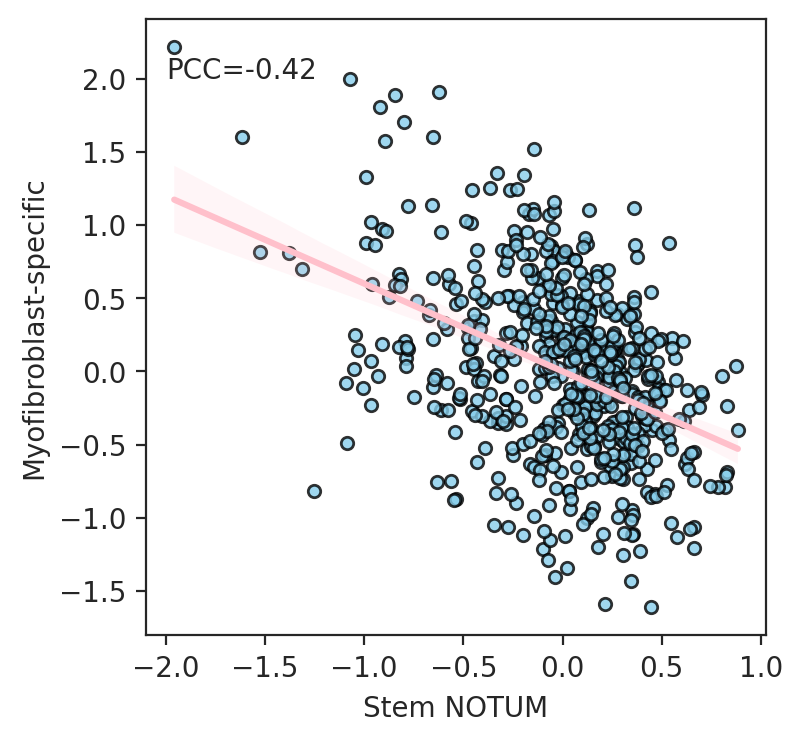

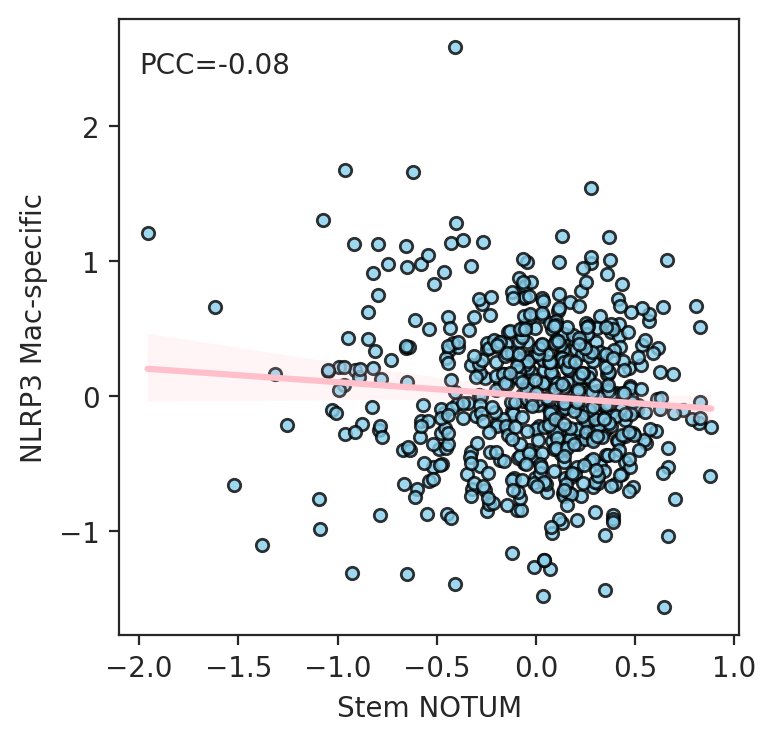

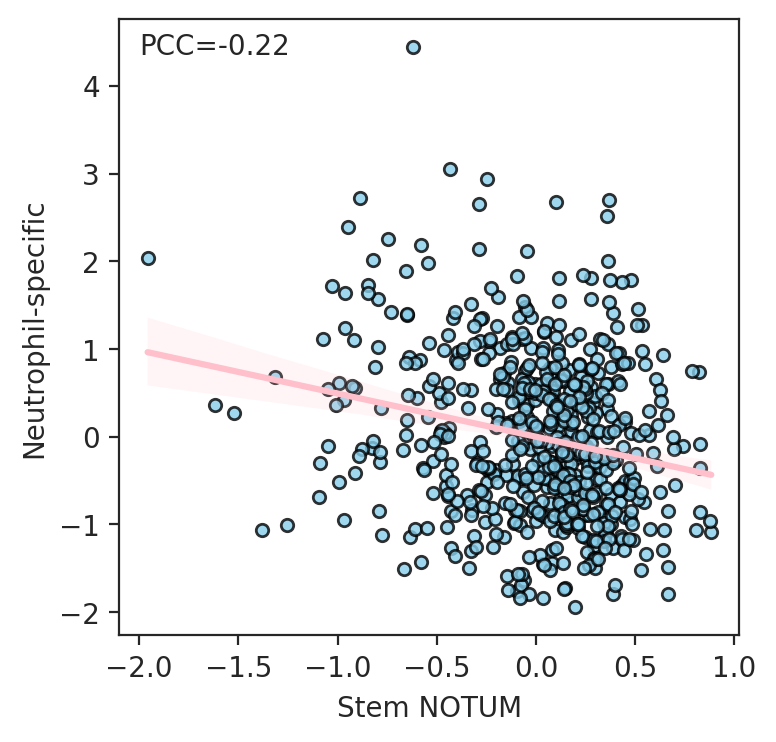

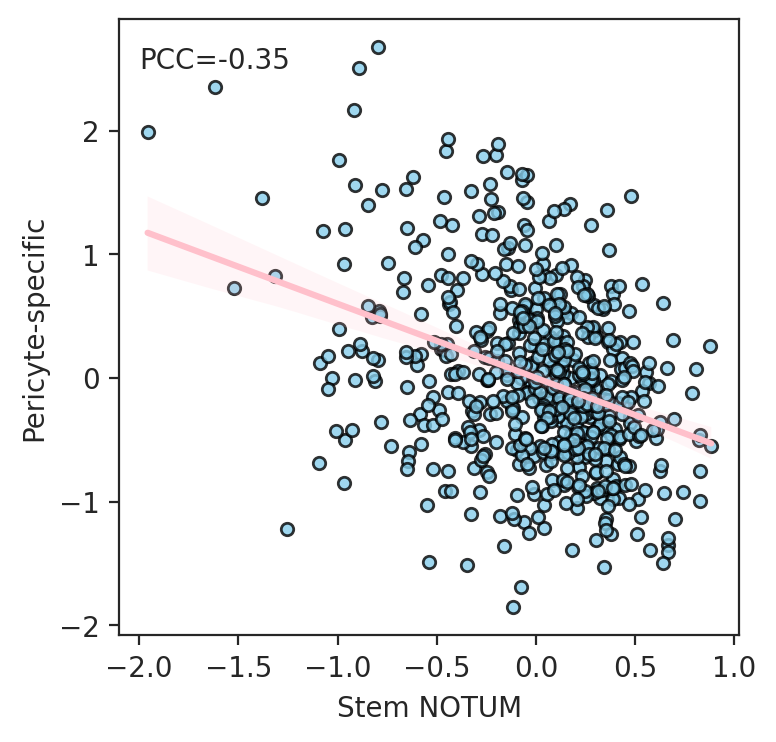

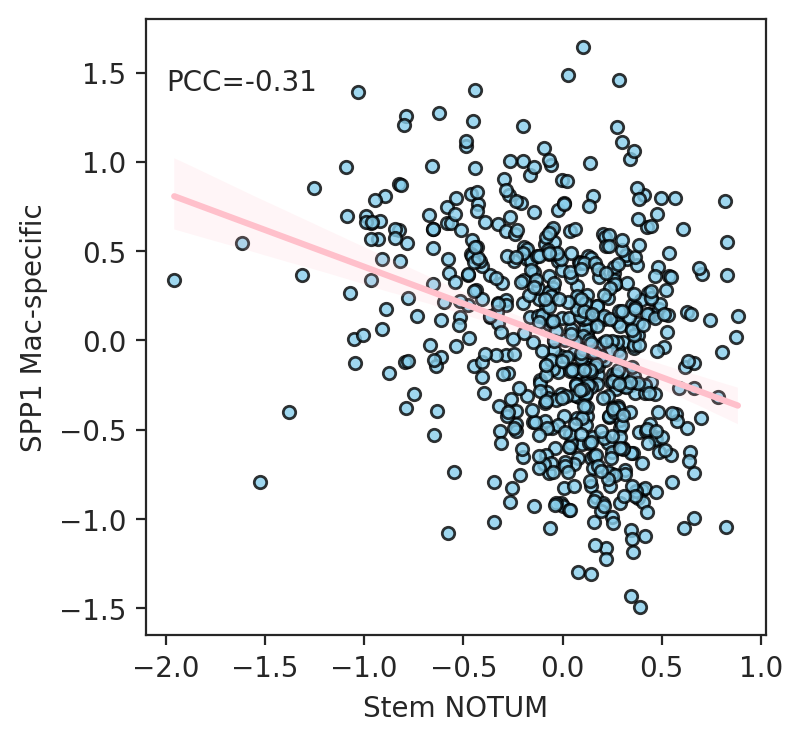

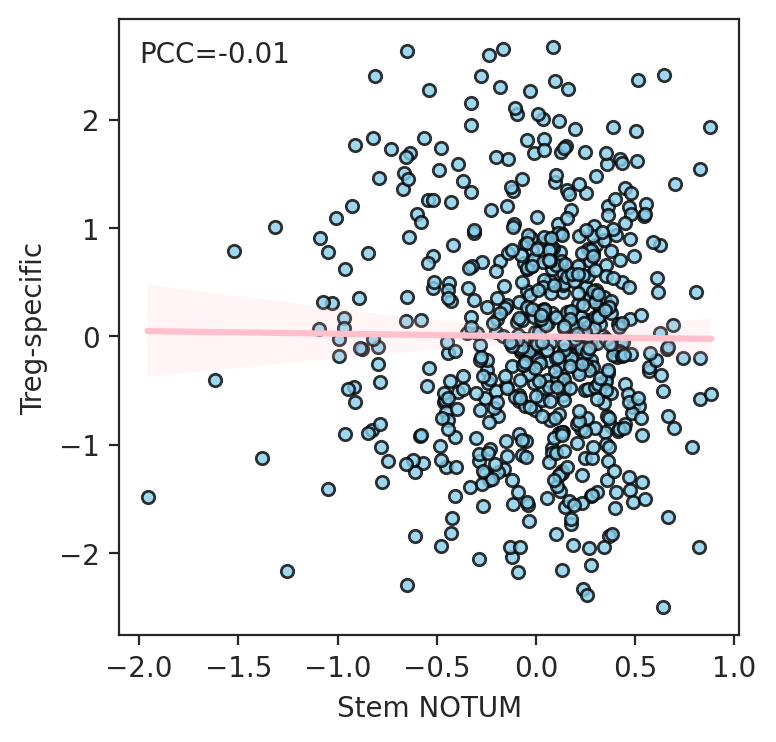

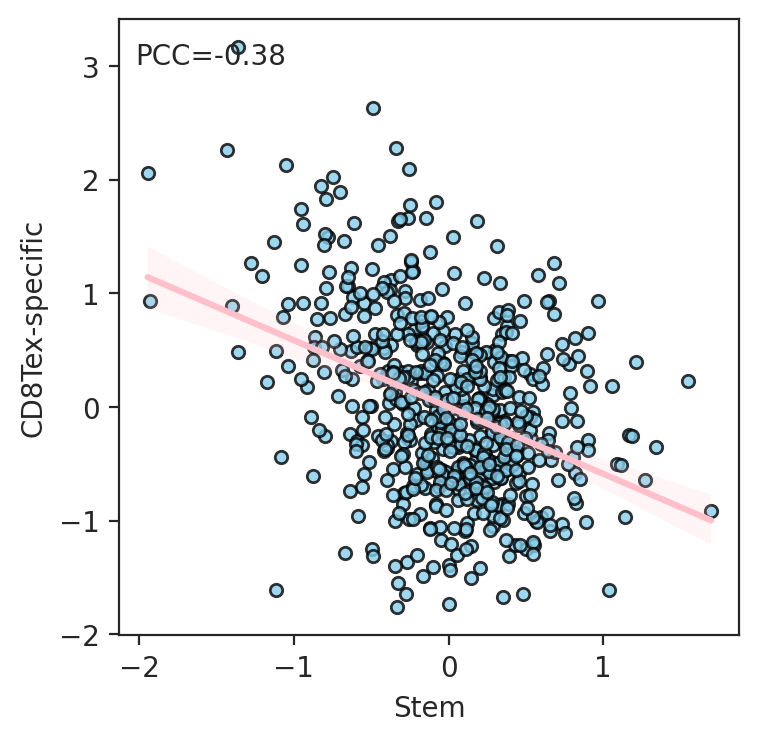

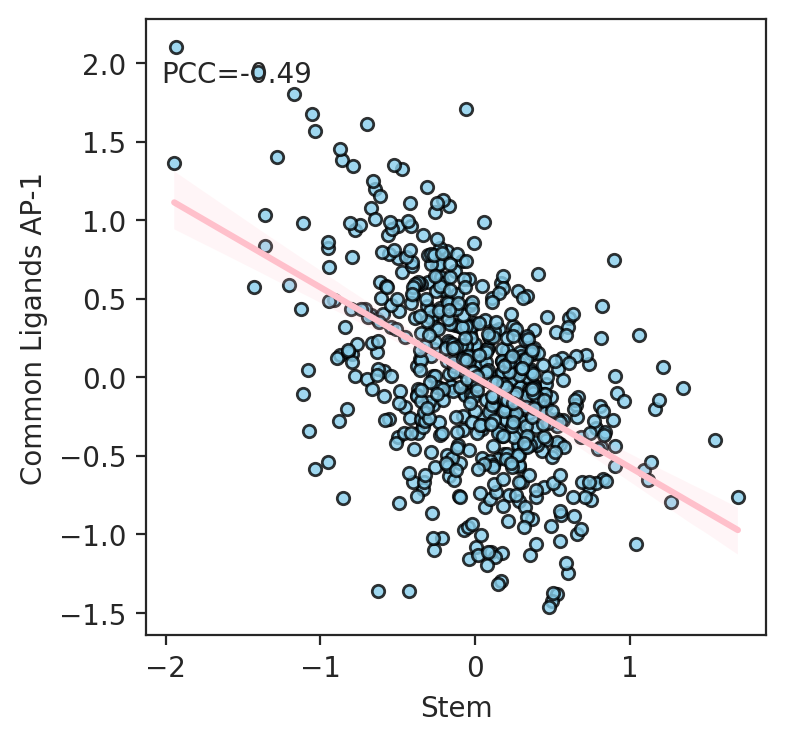

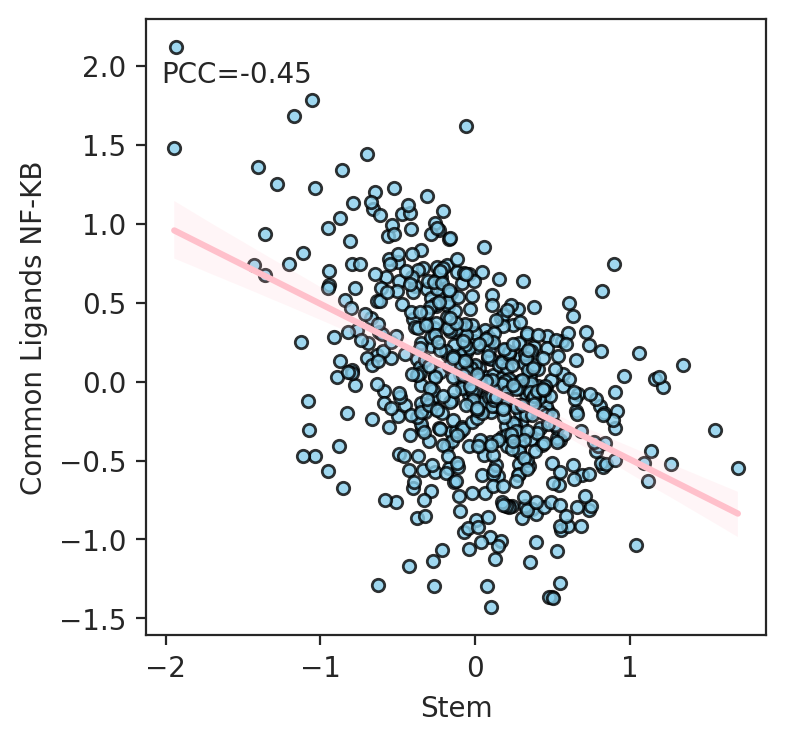

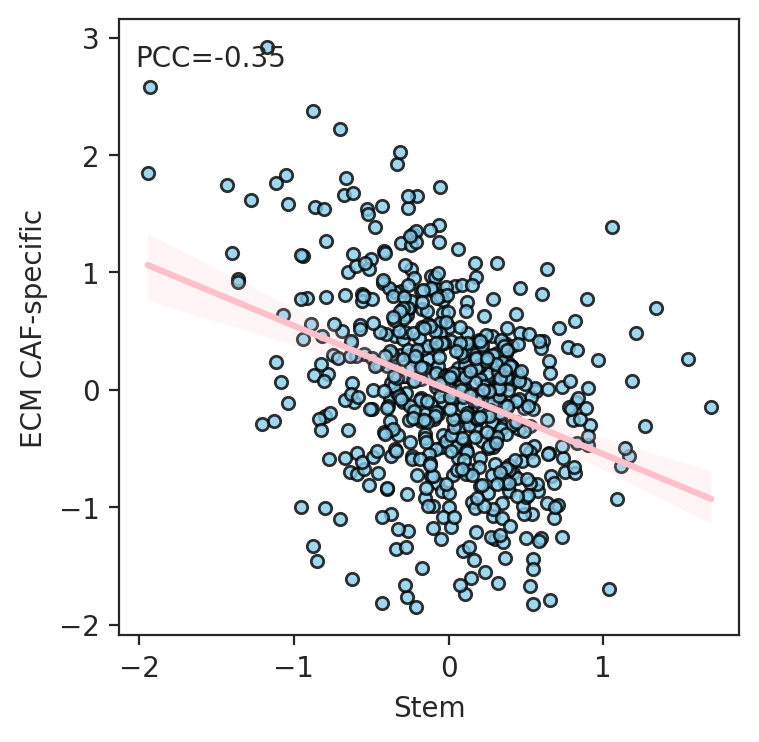

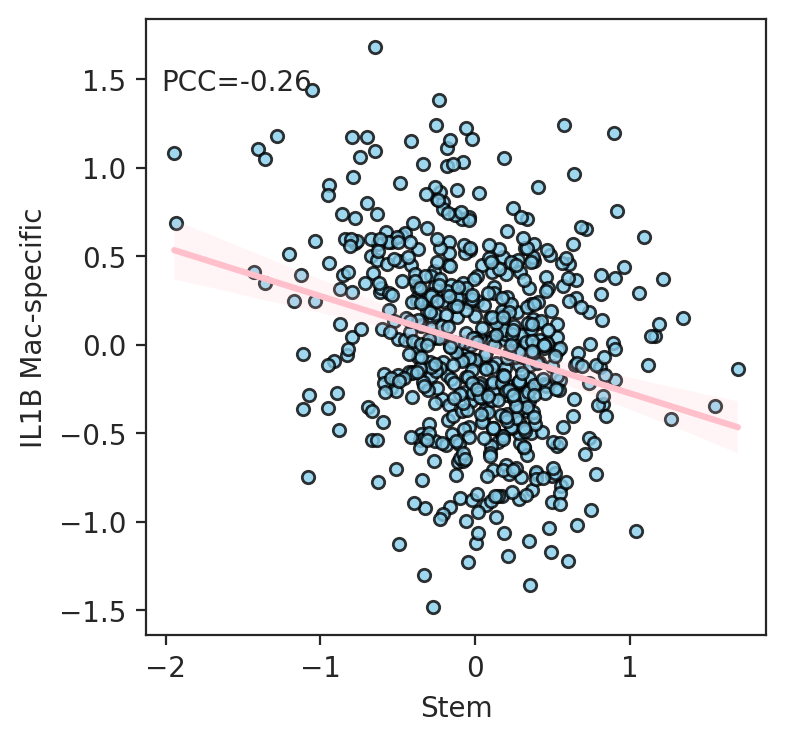

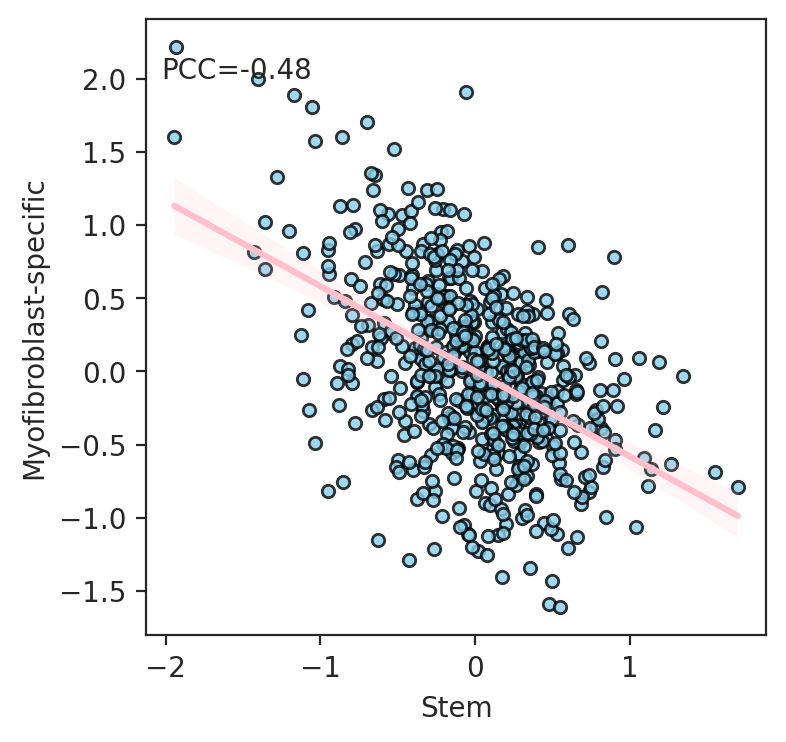

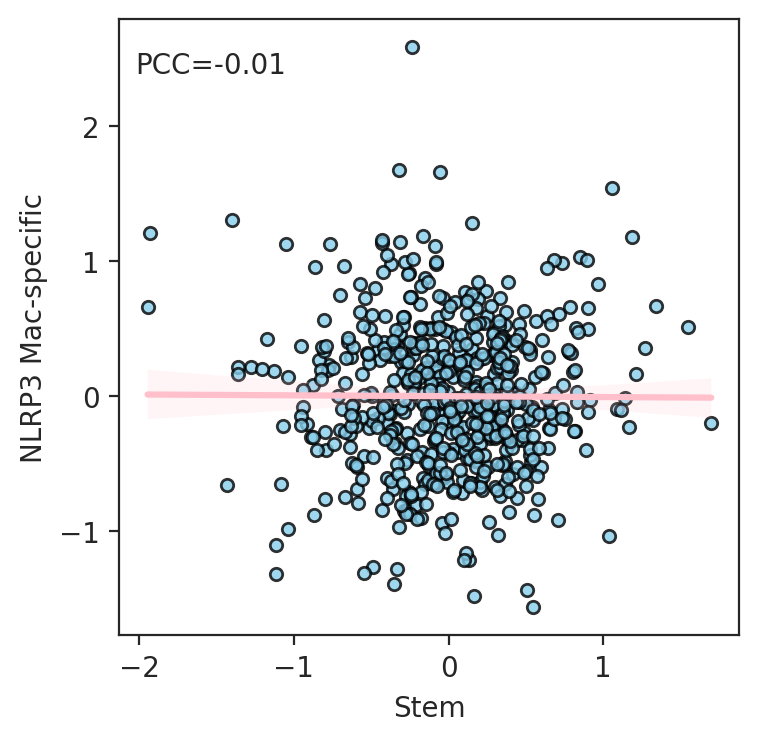

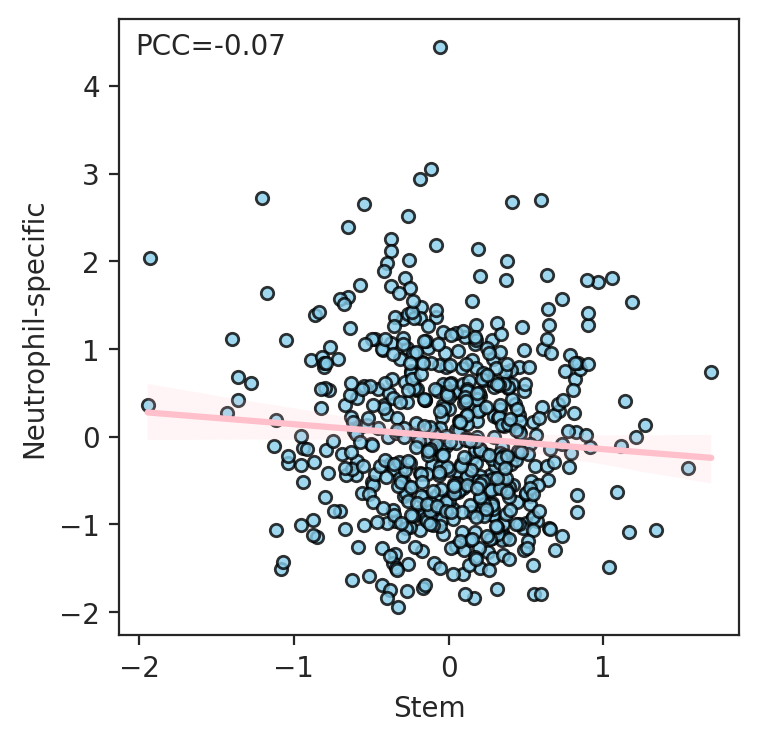

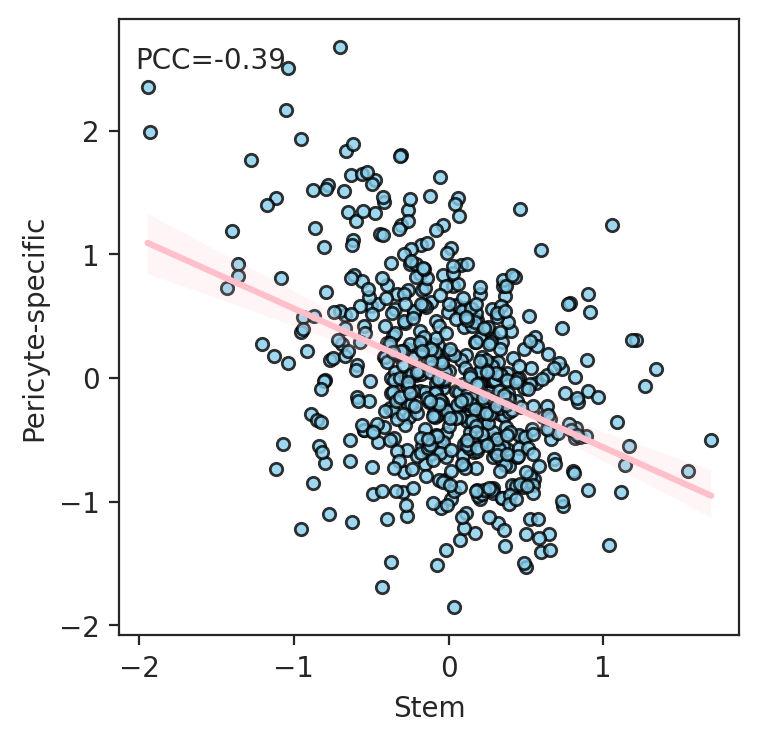

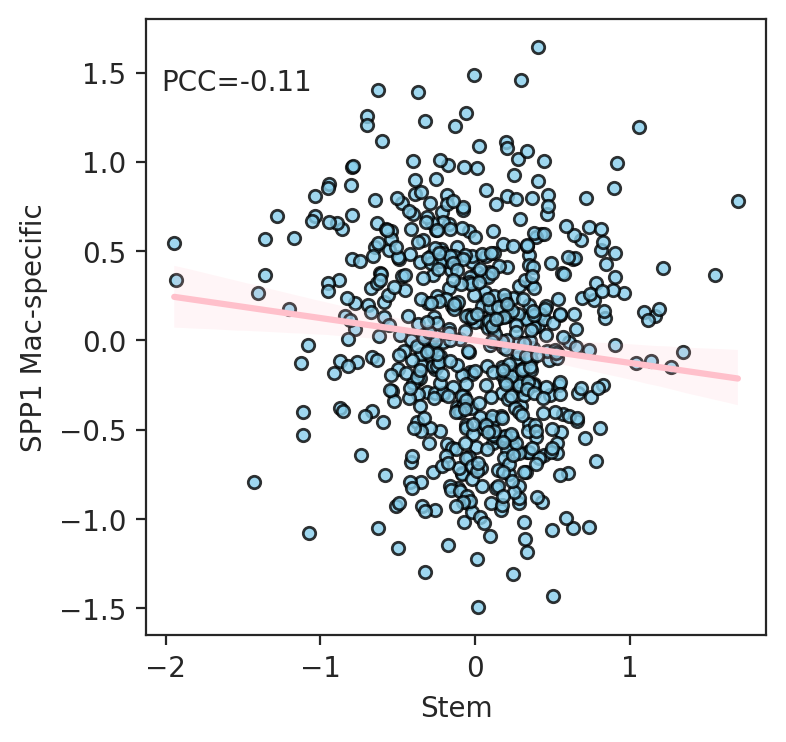

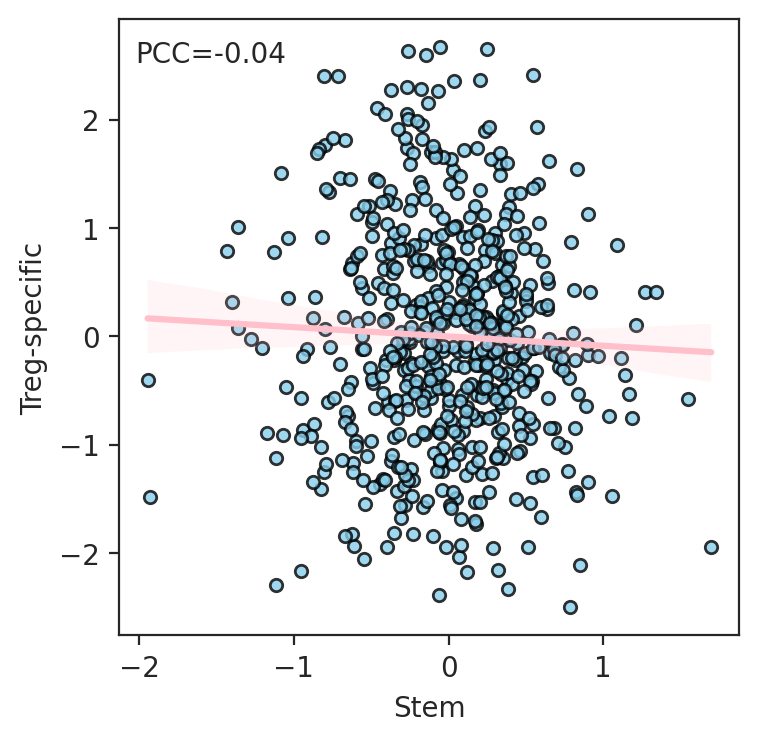

In [13]:
states=['iREC','REC','Stem NOTUM', 'Stem']

# create empty dataframe for results
res_specific = pd.DataFrame(index=list(score_dict_ligands_specific.keys()),columns=states)

for state in states:
    x = cancer_dict_P[state] # x axis - cancer cell state signature
    
    for key in score_dict_ligands_specific:
        y = score_dict_ligands_specific[key] # y axis - TME cell subtype ligand signature

        #calculate Pearson
        corr, pvalue = scipy.stats.pearsonr(x, y, alternative='two-sided', method=None)
        res_specific.loc[key,state]=corr
        print (f"{corr}\t{pvalue}\t{state}\t{key}")
        #create regplot
        with sns.axes_style("ticks"):
            plt.figure(figsize=(4,4))
            sns.regplot(x=x, y=y,
                           scatter_kws={'s':20,'edgecolors':'black',"color": 'skyblue'},
                           line_kws={"color": 'pink'}
                           )
            plt.xlabel(state)
            plt.ylabel(key)
            xmin, xmax, ymin, ymax = plt.axis()
            plt.text(xmin+0.1, ymax-0.4, f"PCC={round(corr,2):.2f}")

In [14]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/nichenet/concat_withWu2022/nichenet_microenvall_celltypes/intersect_cellphonedb/survival_analysis/Figures')

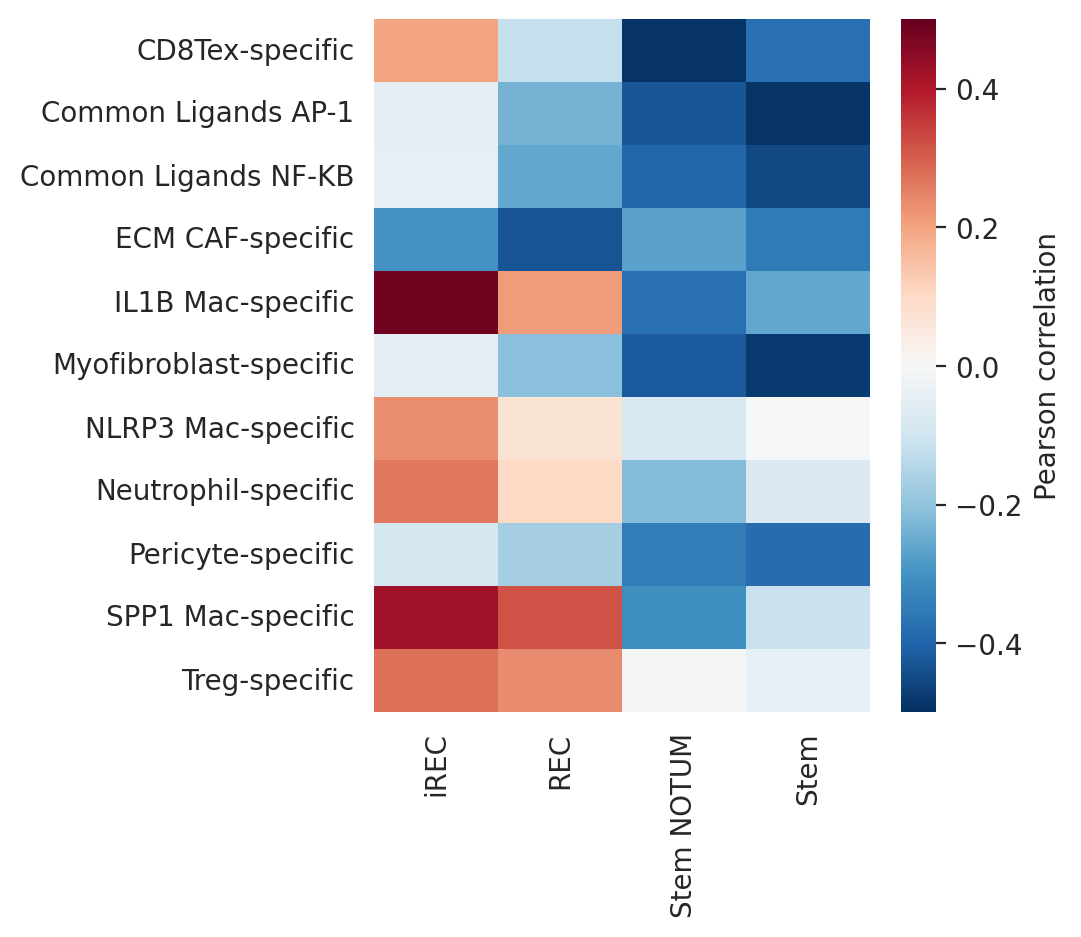

In [15]:
# Set the figure size
plt.figure(figsize=(4, 4.5))

with sns.axes_style('white'):
    sns.heatmap(res_specific.astype('float'), cmap='RdBu_r', vmin=-0.5, vmax=0.5,
               cbar_kws={'label':'Pearson correlation'})
plt.savefig(FIG2SAVE.joinpath("bulkRNAseq_ligandCorrelation_specificLigands.pdf"), bbox_inches="tight", dpi=DPI)
